In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction

У цьому ноутбуку ми аналізуємо набір даний, взятий із актуального змагання https://www.kaggle.com/competitions/playground-series-s3e23 - Software Defects Classification Dataset.

Повний опис датасету можна прочитати за посиланням:
http://promise.site.uottawa.ca/SERepository/datasets/jm1.arff

## Короткий опис даних:

Кожен рядок датасету відповідає певній програмі, написаній на C. Із коду програми обраховувались деякі статистичні ознаки - наприклад, кількість рядків, кількість незалежних частин у коду, кількість унікальних операторів, кількість унікальних змінних, тощо 

(це загалом описується як McCabe metrics і Halstead metrics - можна почитати детальніше у описі датасету).

Attribute Information: 	

%      1. loc             : numeric % McCabe's line count of code

%      2. v(g)            : numeric % McCabe "cyclomatic complexity"

%      3. ev(g)           : numeric % McCabe "essential complexity"

%      4. iv(g)           : numeric % McCabe "design complexity"

%      5. n               : numeric % Halstead total operators + operands

%      6. v               : numeric % Halstead "volume"

%      7. l               : numeric % Halstead "program length"

%      8. d               : numeric % Halstead "difficulty"

%      9. i               : numeric % Halstead "intelligence"

%     10. e               : numeric % Halstead "effort"

%     11. b               : numeric % Halstead 

%     12. t               : numeric % Halstead's time estimator

%     13. lOCode          : numeric % Halstead's line count

%     14. lOComment       : numeric % Halstead's count of lines of comments

%     15. lOBlank         : numeric % Halstead's count of blank lines

%     16. lOCodeAndComment: numeric

%     17. uniq_Op         : numeric % unique operators

%     18. uniq_Opnd       : numeric % unique operands

%     19. total_Op        : numeric % total operators

%     20. total_Opnd      : numeric % total operands

%     21: branchCount     : numeric % of the flow graph

%     22. defects         : {false,true} % module has/has not one or more 

%                                        % reported defects

Missing attributes: none

Class Distribution: the class value (defects) is discrete 

%    false: 2106 = 19.35%

%    true:  8779 = 80.65%



In [2]:
data = pd.read_csv("train.csv", index_col = 'id')
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False


Потрібно розібратися у змінних - чи є у нас категоріальні змінні?

Подивимось на кількість унікальних значень у колонках

In [3]:
data.nunique()

loc                   378
v(g)                  106
ev(g)                  71
iv(g)                  84
n                     836
v                    4515
l                      55
d                    3360
i                    5171
e                    8729
b                     315
t                    8608
lOCode                298
lOComment              91
lOBlank                94
locCodeAndComment      29
uniq_Op                70
uniq_Opnd             176
total_Op              623
total_Opnd            485
branchCount           144
defects                 2
dtype: int64

Схоже, що всі змінні - числові, категоріальний тільки target (True/False)

In [4]:
target = 'defects'
numerical = data.columns.difference([target])
numerical

Index(['b', 'branchCount', 'd', 'e', 'ev(g)', 'i', 'iv(g)', 'l', 'lOBlank',
       'lOCode', 'lOComment', 'loc', 'locCodeAndComment', 'n', 't', 'total_Op',
       'total_Opnd', 'uniq_Op', 'uniq_Opnd', 'v', 'v(g)'],
      dtype='object')

Подивимось на кореляції в даних

<Axes: >

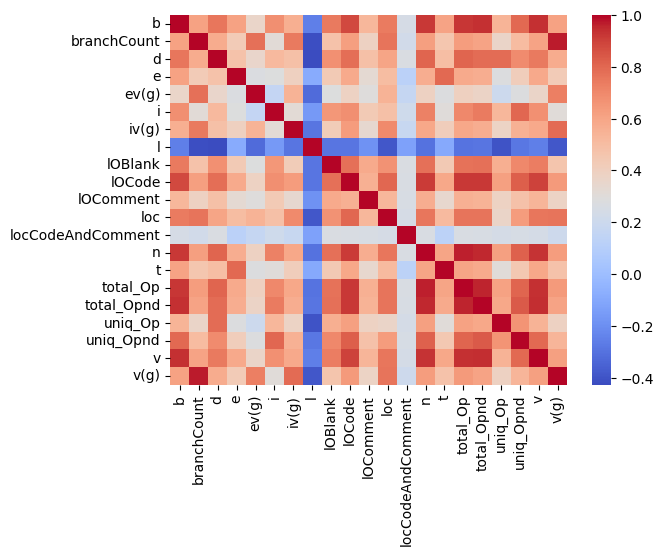

In [5]:
sns.heatmap(data[numerical].corr().round(4), cmap='coolwarm')

<Axes: >

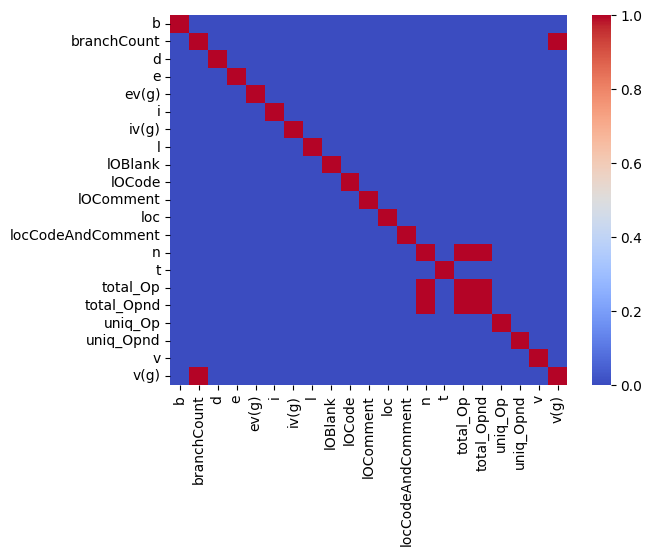

In [6]:
sns.heatmap( (data[numerical].corr()>0.95) | (data[numerical].corr()<-0.95), cmap='coolwarm')

<Axes: >

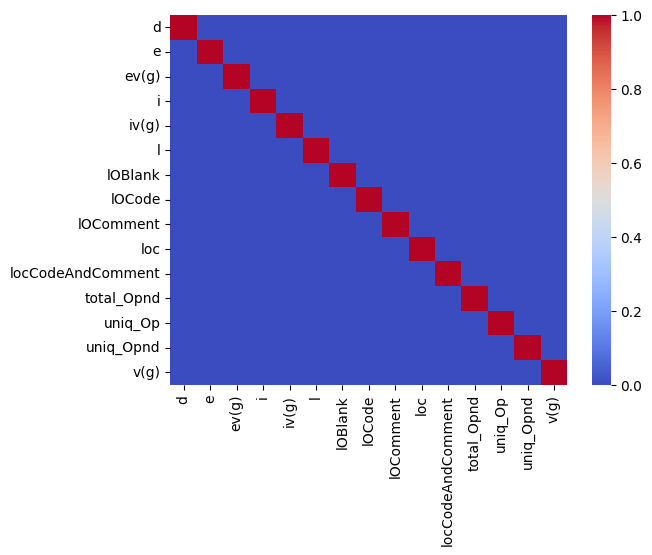

In [7]:
cols_to_remove = ['b','branchCount','t', 'v','total_Op', 'n']
numerical_cleaned = numerical.difference(cols_to_remove)

sns.heatmap( (data[numerical_cleaned].corr()>0.95) | (data[numerical_cleaned].corr()<-0.95), cmap='coolwarm')

In [8]:
data[numerical].corrwith(data[target]).sort_values(ascending = False, key = np.abs)

loc                  0.342642
branchCount          0.322827
v(g)                 0.301187
ev(g)                0.259928
n                    0.258080
lOBlank              0.257819
l                   -0.253237
total_Opnd           0.252752
lOCode               0.250604
total_Op             0.250533
uniq_Opnd            0.246113
iv(g)                0.245618
d                    0.241936
b                    0.232594
v                    0.231179
i                    0.208577
lOComment            0.205402
uniq_Op              0.178474
locCodeAndComment    0.133150
t                    0.099592
e                    0.095366
dtype: float64

Подивимось на статистичний розподіл в даних

In [9]:
data[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
b,101763.0,0.179164,0.421844,0.0,0.03,0.08,0.19,26.95
branchCount,101763.0,9.839549,14.412769,1.0,3.00,5.00,11.00,503.00
d,101763.0,13.681881,14.121306,0.0,5.60,9.82,18.00,418.20
e,101763.0,20853.589876,190571.405427,0.0,564.73,2256.23,10193.24,16846621.12
ev(g),101763.0,2.845022,4.631262,1.0,1.00,1.00,3.00,165.00
i,101763.0,27.573007,22.856742,0.0,15.56,23.36,34.34,569.78
iv(g),101763.0,3.498826,5.534541,1.0,1.00,2.00,4.00,402.00
l,101763.0,0.111634,0.100096,0.0,0.05,0.09,0.15,1.00
lOBlank,101763.0,3.979865,6.382358,0.0,1.00,2.00,5.00,219.00
lOCode,101763.0,22.802453,38.541010,0.0,7.00,14.00,26.00,2824.00


Подивимось на аномалії в даних

In [10]:
for col in numerical:
    mean, std = data[col].mean(), data[col].std()
    print(f"column = {col}, mean-4std = {mean-4*std}, mean+4std = {mean+4*std}")
    print(data[(data[col]<mean-4*std) | (data[col]>mean+4*std)][col].values)

column = b, mean-4std = -1.5082133733024592, mean+4std = 1.8665414493222303
[ 3.48  3.66  3.8   1.94  5.99  2.55  3.8   1.9   3.22  3.23  3.59  2.47
  6.13  1.9   2.23  3.11  2.07  4.79  2.29  3.02  2.05  3.7   4.56  2.26
  2.    2.6   2.88  4.93 15.65  5.33  5.07  2.4   2.    1.87  2.02  3.11
  2.    2.37  5.99  2.12  1.89  2.87  2.05  2.07  1.99  3.7   5.33  2.
  3.04  2.29  2.52  3.1   2.    3.03  2.23  2.    2.81  3.1   3.03 10.41
  2.47  3.78  2.65  2.05  2.05  2.65  2.61  3.04  2.73  4.09  3.03  2.23
  3.38  3.39  2.38  3.22  2.47  2.53  3.99  2.02  3.95  3.04  4.14  2.07
  2.05  2.95  5.13  2.05  2.71  3.22  2.55  5.13  3.49  3.66  3.23  4.14
  2.06  2.6   3.03  1.87 20.47  2.73  1.87  1.87  2.18  2.61  3.62  3.04
  2.1   3.22  2.4   2.89  2.07  2.23  2.57  1.9   2.46  4.09  2.45  5.13
  2.12  2.29  2.62  2.07  3.59  5.13  3.    2.75  4.76  2.81  5.53  2.63
  2.6   2.63  4.05  2.29  2.    2.13  3.39  6.13  4.77  2.02  2.05  2.87
  2.47  2.02  2.02  2.05  2.82  2.38  2.27  6.13  

In [11]:
"""
fig, axs = plt.subplots(len(numerical), 2, figsize = (2*6, 4*len(numerical)))

for i, col in enumerate(numerical):
    axs[i][0].set_title(f"{col} distribution"); axs[i][0].hist(data[col], color='red')
    
    axs[i][1].set_title(f'{col} vs {target}');
    axs[i][1].hist(data[col][data[target]==True], density=True, color='blue', alpha=0.5, label='target==True')
    axs[i][1].hist(data[col][data[target]==False], density=True, color='red', alpha=0.5, label='target==False')
    axs[i][1].legend()
"""

'\nfig, axs = plt.subplots(len(numerical), 2, figsize = (2*6, 4*len(numerical)))\n\nfor i, col in enumerate(numerical):\n    axs[i][0].set_title(f"{col} distribution"); axs[i][0].hist(data[col], color=\'red\')\n    \n    axs[i][1].set_title(f\'{col} vs {target}\');\n    axs[i][1].hist(data[col][data[target]==True], density=True, color=\'blue\', alpha=0.5, label=\'target==True\')\n    axs[i][1].hist(data[col][data[target]==False], density=True, color=\'red\', alpha=0.5, label=\'target==False\')\n    axs[i][1].legend()\n'

Outliers removal (чистка викидів, правило 4 сігма)

In [12]:
#for col in numerical:
#    mean, std = data[col].mean(), data[col].std()
#    print(f"column = {col}, mean-4std = {mean-4*std}, mean+4std = {mean+4*std}")
#    data = data[(data[col]>mean-4*std) & (data[col]<mean+4*std)]

Як ми бачимо, дані у нас різних масштабів. Тому проведемо масштабування даних (нормалізація або стандартизація - на вибір)

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
#scaler = MinMaxScaler()

data_scaled_arr = scaler.fit_transform(data[numerical])

data_scaled = data.copy()
data_scaled[numerical] = data_scaled_arr

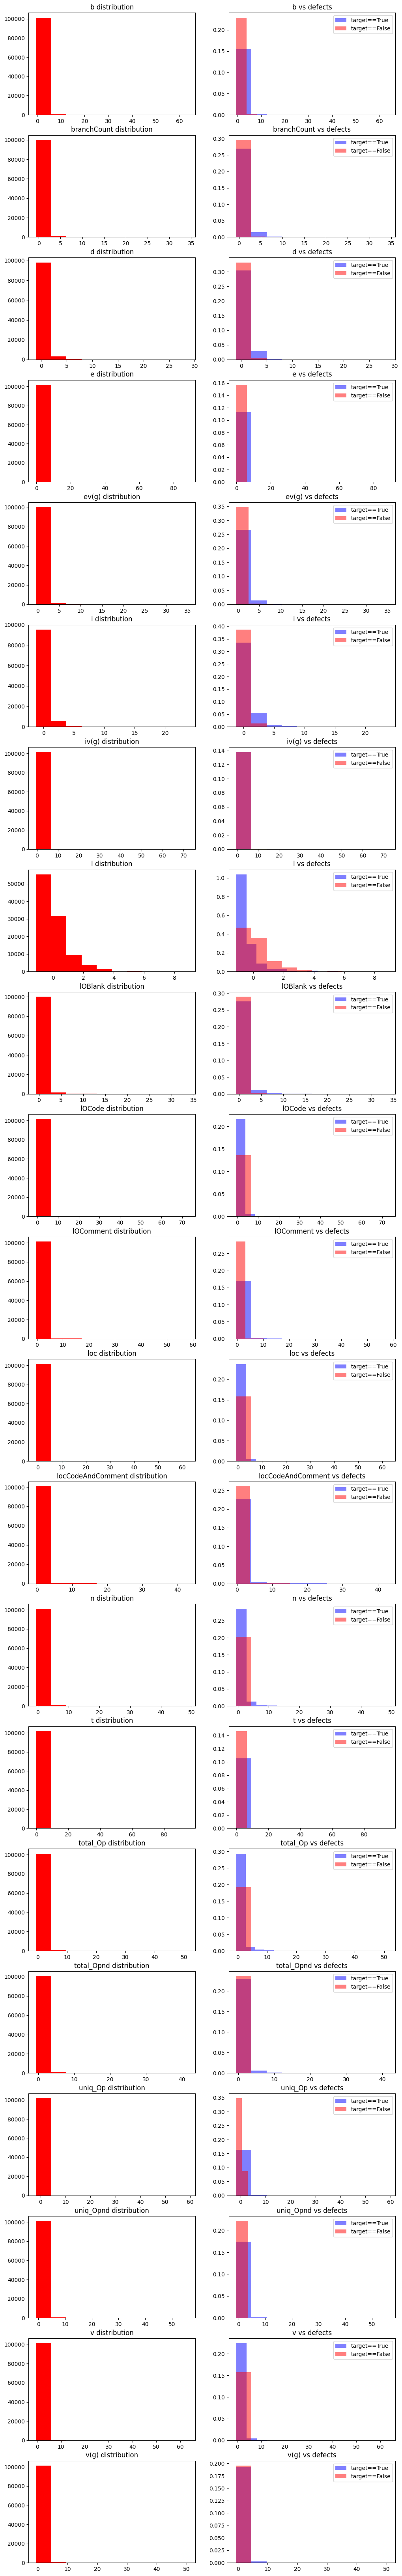

In [14]:
fig, axs = plt.subplots(len(numerical), 2, figsize = (2*6, 4*len(numerical)))

for i, col in enumerate(numerical):
    axs[i][0].set_title(f"{col} distribution"); axs[i][0].hist(data_scaled[col], color='red')
    
    axs[i][1].set_title(f'{col} vs {target}');
    axs[i][1].hist(data_scaled[col][data_scaled[target]==True], density=True, color='blue', alpha=0.5, label='target==True')
    axs[i][1].hist(data_scaled[col][data_scaled[target]==False], density=True, color='red', alpha=0.5, label='target==False')
    axs[i][1].legend()

In [15]:
data[numerical].describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
b,101763.0,0.1792,0.4218,0.0,0.03,0.08,0.19,26.95
branchCount,101763.0,9.8395,14.4128,1.0,3.00,5.00,11.00,503.00
d,101763.0,13.6819,14.1213,0.0,5.60,9.82,18.00,418.20
e,101763.0,20853.5899,190571.4054,0.0,564.73,2256.23,10193.24,16846621.12
ev(g),101763.0,2.8450,4.6313,1.0,1.00,1.00,3.00,165.00
i,101763.0,27.5730,22.8567,0.0,15.56,23.36,34.34,569.78
iv(g),101763.0,3.4988,5.5345,1.0,1.00,2.00,4.00,402.00
l,101763.0,0.1116,0.1001,0.0,0.05,0.09,0.15,1.00
lOBlank,101763.0,3.9799,6.3824,0.0,1.00,2.00,5.00,219.00
lOCode,101763.0,22.8025,38.5410,0.0,7.00,14.00,26.00,2824.00


In [16]:
data_scaled[numerical].describe().round(4).T

,count,mean,std,min,25%,50%,75%,max
b,101763.0,0.0,1.0,-0.4247,-0.3536,-0.2351,0.0257,63.4617
branchCount,101763.0,-0.0,1.0,-0.6133,-0.4746,-0.3358,0.0805,34.2171
d,101763.0,0.0,1.0,-0.9689,-0.5723,-0.2735,0.3058,28.6461
e,101763.0,-0.0,1.0,-0.1094,-0.1065,-0.0976,-0.0559,88.2916
ev(g),101763.0,-0.0,1.0,-0.3984,-0.3984,-0.3984,0.0335,35.0133
i,101763.0,-0.0,1.0,-1.2063,-0.5256,-0.1843,0.2961,23.7221
iv(g),101763.0,-0.0,1.0,-0.4515,-0.4515,-0.2708,0.0906,72.0029
l,101763.0,-0.0,1.0,-1.1153,-0.6157,-0.2161,0.3833,8.8752
lOBlank,101763.0,-0.0,1.0,-0.6236,-0.4669,-0.3102,0.1598,33.6899
lOCode,101763.0,-0.0,1.0,-0.5916,-0.4100,-0.2284,0.0830,72.6813


Далі:

- поділимо дані на train, val частини

- побудуємо деяку бейзлайн модель

- оцінимо її на валідаційному датасеті

- зробимо сабміт у змагання на тестовій частині даних

In [17]:
from sklearn.model_selection import train_test_split
X_scaled_train, X_scaled_val, y_train, y_val = train_test_split(data_scaled[numerical], data_scaled[target], 
                                                                stratify=data_scaled[target])

#stratify - поділити таким чином, щоб зберегти співвідношення класів у вибірках
y_train.value_counts()/len(y_train), y_val.value_counts()/len(y_val)

(defects
 False    0.773355
 True     0.226645
 Name: count, dtype: float64,
 defects
 False    0.773358
 True     0.226642
 Name: count, dtype: float64)

## Будуємо бейслайн модель

In [27]:
from sklearn.linear_model import RidgeClassifier #Linear Regression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # neigbors
from sklearn.neural_network import MLPClassifier #perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

model = LogisticRegression(solver = 'newton-cg')
model_cols = numerical_cleaned

model.fit(X_scaled_train[model_cols], y_train)

LogisticRegression(solver='newton-cg')

In [28]:
from sklearn.metrics import classification_report, roc_auc_score

y_val_predict = model.predict(X_scaled_val[model_cols])
print(classification_report(y_val, y_val_predict))

              precision    recall  f1-score   support

       False       0.82      0.97      0.89     19675
        True       0.70      0.26      0.38      5766

    accuracy                           0.81     25441
   macro avg       0.76      0.61      0.63     25441
weighted avg       0.79      0.81      0.77     25441



In [29]:
y_val_predict_proba = model.predict_proba(X_scaled_val[model_cols])[:,1]
roc_auc_score(y_val, y_val_predict_proba)

0.7815142484026548

# Код для відправки рішення на Kaggle

https://www.kaggle.com/competitions/playground-series-s3e23

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

cv_results = cross_validate(RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1), data[model_cols], 
                            data_scaled[target],cv=5, return_estimator = True, scoring = 'roc_auc' )
cv_results

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   19.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   28.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 task

{'fit_time': array([19.33510041, 28.28269792, 26.31297994, 18.57056904, 17.01152968]),
 'score_time': array([1.3101387 , 0.86593127, 1.13986969, 0.57800341, 0.59525394]),
 'estimator': [RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1),
  RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1),
  RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1),
  RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1),
  RandomForestClassifier(n_estimators=200, n_jobs=-1, verbose=1)],
 'test_score': array([0.77320974, 0.76878417, 0.77517572, 0.77028453, 0.76916289])}

In [34]:
[model.predict_proba(data_test_scaled[model_cols])[:,1] for model in cv_results['estimator']]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      |

[array([0.01 , 0.01 , 0.155, ..., 0.01 , 0.005, 0.005]),
 array([0.02125, 0.01   , 0.2825 , ..., 0.01   , 0.     , 0.     ]),
 array([0.015     , 0.02      , 0.26533333, ..., 0.015     , 0.        ,
        0.        ]),
 array([0.015, 0.025, 0.275, ..., 0.025, 0.005, 0.005]),
 array([0.01      , 0.015     , 0.23458333, ..., 0.01      , 0.005     ,
        0.005     ])]

In [35]:
sub = pd.read_csv("sample_submission.csv")

data_test = pd.read_csv("test.csv", index_col = 'id')
data_test_scaled = data_test.copy()

data_test_scaled[numerical] = scaler.transform(data_test_scaled[numerical])

sub[target] = model.predict_proba(data_test_scaled[model_cols])[:,1]
#preds = [model.predict_proba(data_test_scaled[model_cols])[:,1] for model in cv_results['estimator']]
#sub[target] = sum(preds)/len(preds)
sub.to_csv("submission.csv", index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      |

Ступені свободи:

- можна по іншому робити відбір ознак (регуляризація, головні компоненти, або інші селектори)

- можна по іншому позбуватись викидів (LocalOutlierFactor, OneClassSVM)

- можна інше масштабування (напркилад, MinMaxScaler, RobustScaler)

- можна підбирати іншу модель (Ridge, Perceptron, інші моделі)